In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-29 11:33:55.712084: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_mean_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10210  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10211  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10212  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10213  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10214  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.237778   
1      4.113529  4.223896  63.821798  62.581992  ...           112.237778   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.634445   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.634445   
4      4.405489  4.587935  60.655199  58.351445  ...            56.230000   
...         ...       ...        ...        ...  ...                  ...   
10210  4.346215  4.374028  86.797202  86.444072  ...           -13.353333   
10211  4.236066  4.264247  89.521652  89.357990  ...           105.097778   
10212  4.237512  4.264786  90.106352  89.978233  ...           105.097778   
10213  3.745458  3.792684  82.634552  82.112733  ...          -145.220001   
10214  3.823687  3.867705  84.046602  83.596072  ...          -146.091110   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.411110           22.719999            61.927776   
1               67.411110           22.719999            61.927776   
2              -98.663330          -52.694443            57.665554   
3              -98.663330          -52.694443            57.665554   
4              101.641106          146.938889            36.868889   
...                   ...                 ...                  ...   
10210          -57.936665         -102.671112            59.132221   
10211           60.434441           15.702221            52.826668   
10212           60.434441           15.702221            52.826668   
10213          -99.427780          -53.618889            51.765553   
10214         -100.295555          -54.435555            51.573334   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.788891           61.792221    20180403T030600Z   
1               50.788891           61.792221    20180403T030600Z   
2               46.183331           57.551105    20180404T042700Z   
3               46.183331           57.551105    20180404T042700Z   
4               27.528889           36.837780    20180404T175400Z   
...                   ...                 ...                 ...   
10210           48.085556           59.247776    20200121T132400Z   
10211           41.831108           52.777779    20200121T200600Z   
10212           41.831108           52.777779    20200121T200600Z   
10213           40.707779           51.669998    20200121T214800Z   
10214           40.385559           51.209995    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10210  20200121T150558.125000Z  9.854824 -1.954211  
10211  20200121T214758.125000Z  7

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10210  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10211  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10212  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10213  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10214  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.237778   
1      4.113529  4.223896  63.821798  62.581992  ...           112.237778   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.634445   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.634445   
4      4.405489  4.587935  60.655199  58.351445  ...            56.230000   
...         ...       ...        ...        ...  ...                  ...   
10210  4.346215  4.374028  86.797202  86.444072  ...           -13.353333   
10211  4.236066  4.264247  89.521652  89.357990  ...           105.097778   
10212  4.237512  4.264786  90.106352  89.978233  ...           105.097778   
10213  3.745458  3.792684  82.634552  82.112733  ...          -145.220001   
10214  3.823687  3.867705  84.046602  83.596072  ...          -146.091110   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.411110           22.719999            61.927776   
1               67.411110           22.719999            61.927776   
2              -98.663330          -52.694443            57.665554   
3              -98.663330          -52.694443            57.665554   
4              101.641106          146.938889            36.868889   
...                   ...                 ...                  ...   
10210          -57.936665         -102.671112            59.132221   
10211           60.434441           15.702221            52.826668   
10212           60.434441           15.702221            52.826668   
10213          -99.427780          -53.618889            51.765553   
10214         -100.295555          -54.435555            51.573334   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.788891           61.792221    20180403T030600Z   
1               50.788891           61.792221    20180403T030600Z   
2               46.183331           57.551105    20180404T042700Z   
3               46.183331           57.551105    20180404T042700Z   
4               27.528889           36.837780    20180404T175400Z   
...                   ...                 ...                 ...   
10210           48.085556           59.247776    20200121T132400Z   
10211           41.831108           52.777779    20200121T200600Z   
10212           41.831108           52.777779    20200121T200600Z   
10213           40.707779           51.669998    20200121T214800Z   
10214           40.385559           51.209995    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10210  20200121T150558.125000Z  9.854824 -1.954211  
10211  20200121T214758.125000Z  7

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
3175   0.009946 -0.040725  251.644999  2488.538111  1010.165888  1011.414993   
5169  -0.027121  0.194371  239.635000  2487.032256   998.520588   999.752997   
911   -0.002550  0.047334  365.990002  2470.313919  1016.734566  1017.941489   
2467  -0.112423 -0.138597  318.864999  2484.770831  1004.801770  1006.039008   
1305   0.090287  0.021701  334.275000  2472.734501  1018.892789  1020.097504   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  255.695001  2491.591320  1016.959958  1018.225497   
9509   0.067179 -0.072297  334.020003  2476.432567  1003.534996  1004.743500   
2283  -0.001104  0.040936  266.884998  2482.950819  1010.863999  1012.084000   
10196  0.078067 -0.018678  245.715002  2491.537245  1003.469848  1004.726501   
8799  -0.012150 -0.032903  348.375000  2483.558340  1005.807594  1007.030014   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
3175   2.023150  2.102516  44.113950  42.683681  ...            53.956665   
5169   3.178341  3.271420  66.910311  65.581157  ...            70.139999   
911    9.171636  9.150481  97.994251  98.260211  ...          -144.827774   
2467   3.824792  3.934362  79.711996  78.629340  ...          -145.418884   
1305   8.773203  8.746292  87.496500  87.088105  ...          -146.167496   
...         ...       ...        ...        ...  ...                  ...   
7832   2.193931  2.288993  54.886954  53.067623  ...           -19.026665   
9509   6.920789  6.950604  91.900203  91.827979  ...            53.567776   
2283   4.619135  4.734795  66.192197  64.257764  ...            55.698887   
10196  2.997655  3.071019  83.056952  82.119077  ...          -147.272507   
8799   6.143074  6.146627  96.186254  96.298698  ...            52.169998   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
3175            99.791107          145.563339            52.277775   
5169           114.791107          159.307770            49.006664   
911            -98.895554          -52.968887            56.699997   
2467           -99.666664          -53.930000            53.176666   
1305          -100.784996          -55.379997            44.070000   
...                   ...                 ...                  ...   
7832           -63.754440         -108.813324            40.072220   
9509            99.418884          145.202209            52.582222   
2283           101.027779          146.303329            41.101112   
10196         -101.732498          -56.191250            44.463745   
8799            98.211105          144.204437            56.545551   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
3175            41.104446           52.305553    20161028T122100Z   
5169            38.250000           48.833328    20160914T132400Z   
911             45.240002           56.580002    20160901T042700Z   
2467            41.901112           53.065552    20180321T005100Z   
1305            33.764999           43.982498    20170113T003600Z   
...                   ...                 ...                 ...   
7832            30.377777           40.324448    20210123T133900Z   
9509            41.386665           52.604443    20190819T115100Z   
2283            31.166664           41.110001    20180120T140600Z   
10196           34.074997           44.376247    20200117T213000Z   
8799            45.011112           56.299999    20210621T121800Z   

             stop_sensing_time        u10       v10  
3175   20161028T135958.125000Z  15.144855 -2.822690  
5169   20160914T150558.125000Z   8.358912  5.857295  
911    20160901T060858.125000Z   1.758566 -1.261437  
2467   20180321T023258.125000Z   4.061894 -9.476074  
1305   20170113T021758.125000Z   1.902182 -2.111862  
...                        ...        ...       ...  
7832   20210123T152058.125000Z   7.729342  1.375466  
9509   20190819T130258.12

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

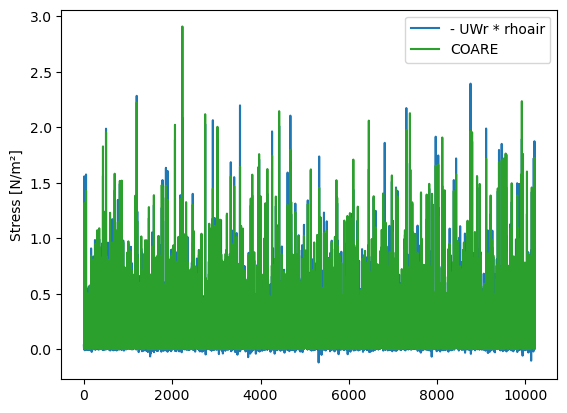

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

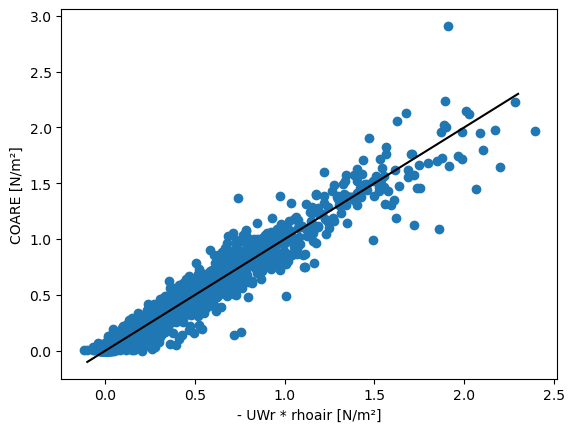

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10215, 67)

In [13]:
df.shape[0]*0.8

8172.0

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

8172

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
3175         -24.494541       -19.985382       -23.340593   
5169         -14.144035       -14.536625       -17.509436   
911          -23.270155       -19.504921       -23.525450   
2467         -13.048532       -10.071937       -16.546289   
1305         -11.955530       -11.123372       -15.879508   
...                 ...              ...              ...   
7832         -15.673146       -10.794934       -11.663801   
9509         -22.078962       -15.619023       -15.329295   
2283         -11.435043        -9.460771       -17.464767   
10196        -15.754350       -13.761406       -18.244162   
8799         -30.581085       -25.683195       -27.574314   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
3175             53.956665           99.791107          145.563339   
5169             70.139999          114.791107          159.307770   
911            -144.827774          -98.895554          -52.968887   
2467           -145.418884          -99.666664          -53.930000   
1305           -146.167496         -100.784996          -55.379997   
...                    ...                 ...                 ...   
7832            -19.026665          -63.754440         -108.813324   
9509             53.567776           99.418884          145.202209   
2283             55.698887          101.027779          146.303329   
10196          -147.272507         -101.732498          -56.191250   
8799             52.169998           98.211105          144.204437   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft        u10  \
3175             52.277775           41.104446           52.305553  15.144855   
5169             49.006664           38.250000           48.833328   8.358912   
911              56.699997           45.240002           56.580002   1.758566   
2467             53.176666           41.901112           53.065552   4.061894   
1305             44.070000           33.764999           43.982498   1.902182   
...                    ...                 ...                 ...        ...   
7832             40.072220           30.377777           40.324448   7.729342   
9509             52.582222           41.386665           52.604443   8.472304   
2283             41.101112           31.166664           41.110001   0.534965   
10196            44.463745           34.074997           44.376247  14.079101   
8799             56.545551           45.011112           56.299999   5.430488   

            v10  
3175  -2.822690  
5169   5.857295  
911   -1.261437  
2467  -9.476074  
1305  -2.111862  
...         ...  
7832   1.375466  
9509   4.346781  
2283   2.769807  
10196  1.822556  
8799  -3.883933  

[10215 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

3175     0.035431
5169     0.316495
911      0.003093
2467     0.476335
1305     0.438565
           ...   
7832     0.190787
9509     0.192332
2283     0.250029
10196    0.180914
8799     0.010593
Length: 10215, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

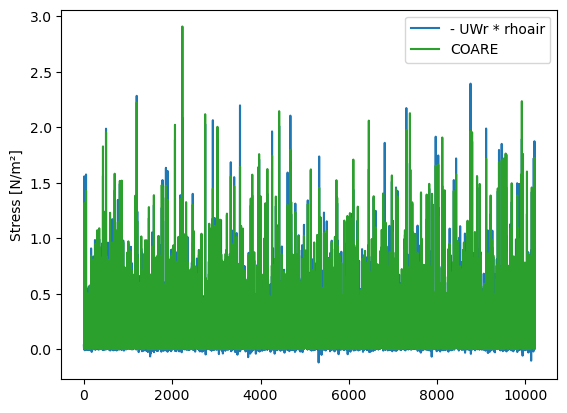

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-29 10:03:02.939339: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 10:03:02.939545: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 10:03:02.939553: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 10:03:02.939576: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 10:03:02.939753: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

179/179 [==============================] - 1s 2ms/step - loss: 1.8395 - mean_absolute_error: 0.9030 - val_loss: 1.7160 - val_mean_absolute_error: 0.8646
Epoch 2/500
179/179 [==============================] - 0s 605us/step - loss: 1.6372 - mean_absolute_error: 0.8394 - val_loss: 1.5576 - val_mean_absolute_error: 0.8135
Epoch 3/500
179/179 [==============================] - 0s 595us/step - loss: 1.4334 - mean_absolute_error: 0.7786 - val_loss: 1.4412 - val_mean_absolute_error: 0.7772
Epoch 4/500
179/179 [==============================] - 0s 555us/step - loss: 1.4004 - mean_absolute_error: 0.7617 - val_loss: 1.3521 - val_mean_absolute_error: 0.7491
Epoch 5/500
179/179 [==============================] - 0s 548us/step - loss: 1.1726 - mean_absolute_error: 0.7196 - val_loss: 1.2969 - val_mean_absolute_error: 0.7344
Epoch 6/500
179/179 [==============================] - 0s 553us/step - loss: 1.2233 - mean_absolute_error: 0.7115 - val_loss: 1.2476 - val_mean_absolute_error: 0.7177
Epoch 7/500


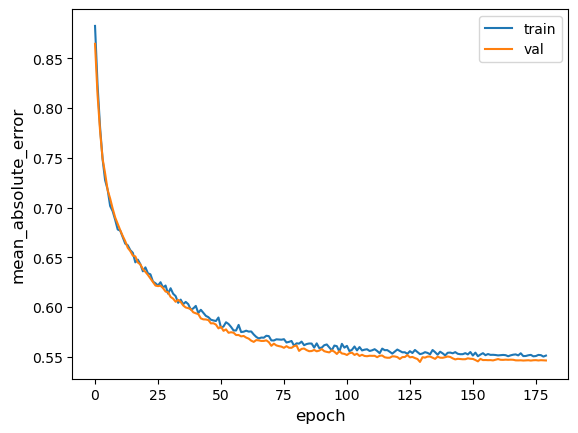

64/64 [==============================] - 0s 265us/step - loss: 1.0131 - mean_absolute_error: 0.5596
Test accuracy 0.5595629215240479
Test loss 1.0130996704101562


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.17850429706352616

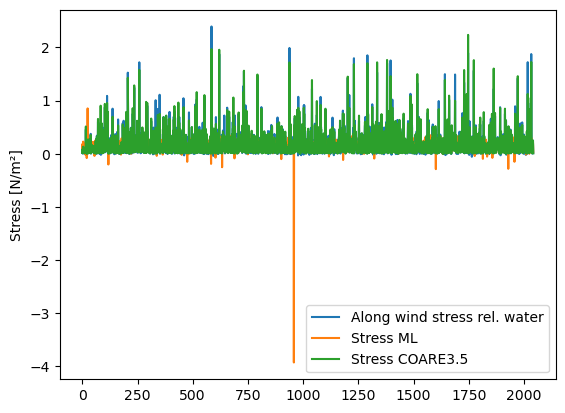

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

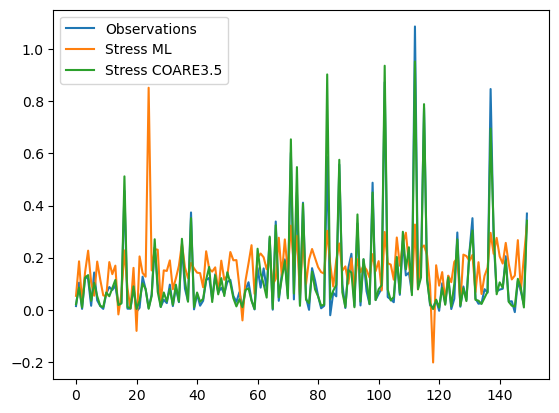

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

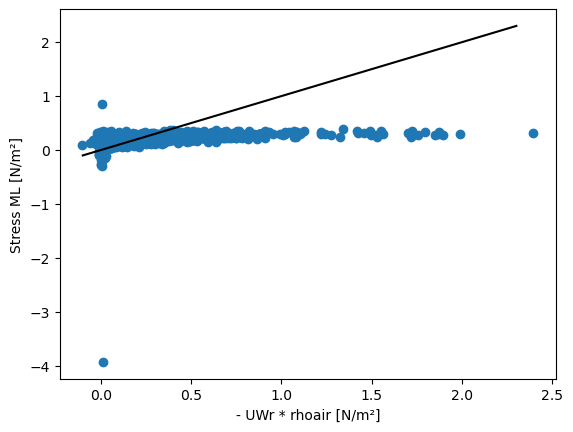

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

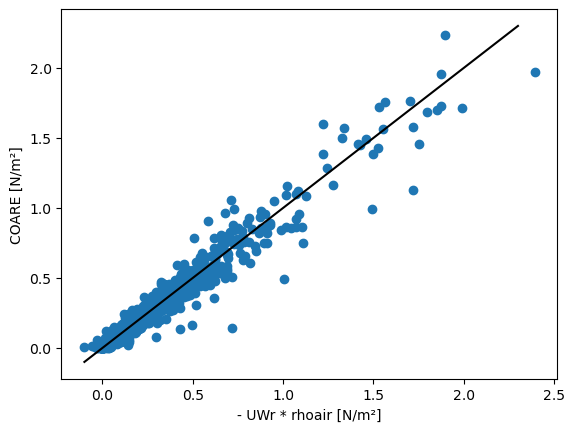

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.2789782213709246

In [35]:
rmse(y_test.values, c_test)

0.053778546718272265

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.36281005],
       [0.36281005, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

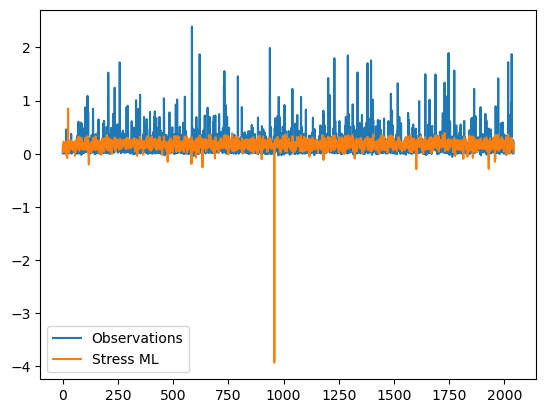

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.36281005],
       [0.36281005, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2789782213709246

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.36281005],
       [0.36281005, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

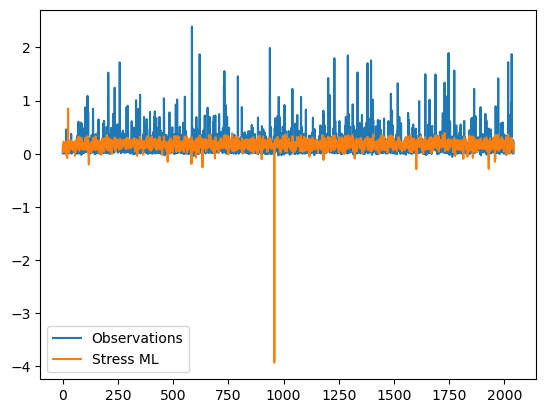

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.36281005],
       [0.36281005, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2789782213709246

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 0s 1ms/step - loss: 1.7953 - mean_absolute_error: 0.9875 - val_loss: 1.2319 - val_mean_absolute_error: 0.7191
Epoch 2/500
179/179 [==============================] - 0s 693us/step - loss: 1.1380 - mean_absolute_error: 0.7186 - val_loss: 0.9574 - val_mean_absolute_error: 0.6133
Epoch 3/500
179/179 [==============================] - 0s 683us/step - loss: 1.0162 - mean_absolute_error: 0.6378 - val_loss: 0.8712 - val_mean_absolute_error: 0.5875
Epoch 4/500
179/179 [==============================] - 0s 680us/step - loss: 0.9092 - mean_absolute_error: 0.6002 - val_loss: 0.8291 - val_mean_absolute_error: 0.5738
Epoch 5/500
179/179 [==============================] - 0s 687us/step - loss: 0.8418 - mean_absolute_error: 0.5814 - val_loss: 0.7986 - val_mean_absolute_error: 0.5679
Epoch 6/500
179/179 [==============================] - 0s 689us/step - loss: 0.8797 - mean_absolute_error: 0.5962 - val_loss: 0.7844 - val_mean_absolute_error: 0.5527


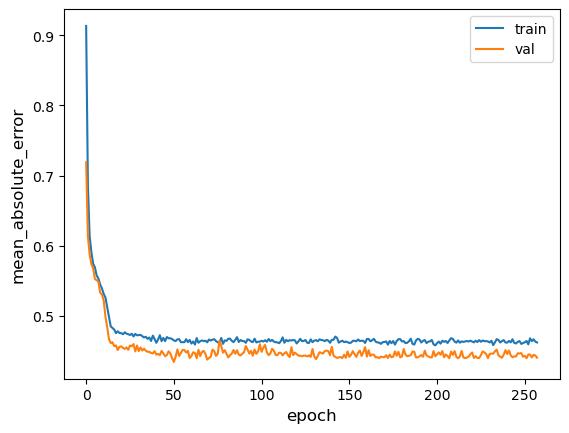

64/64 [==============================] - 0s 346us/step - loss: 0.8961 - mean_absolute_error: 0.4634
Test accuracy 0.46341970562934875
Test loss 0.8961455821990967


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

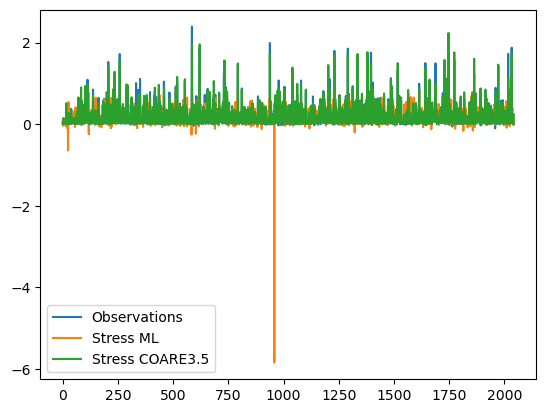

In [53]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

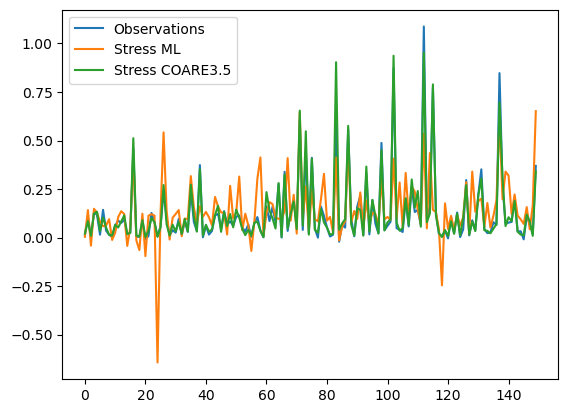

In [54]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.3253270939721633

## Correlation

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.54372021],
       [0.54372021, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [58]:
y_test.values.shape

(2043,)

In [59]:
y_test_pred[:, 0].shape

(2043,)

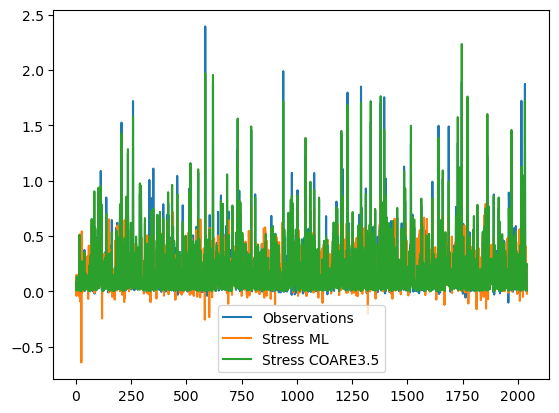

In [60]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

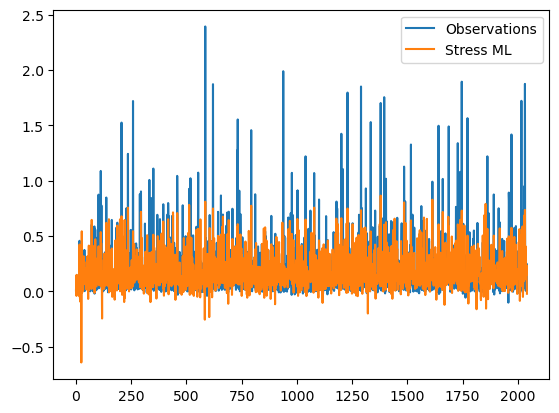

In [61]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [62]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692328],
       [0.97692328, 1.        ]])

In [63]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2969056851570206

Text(0, 0.5, 'Stress ML [N/m²]')

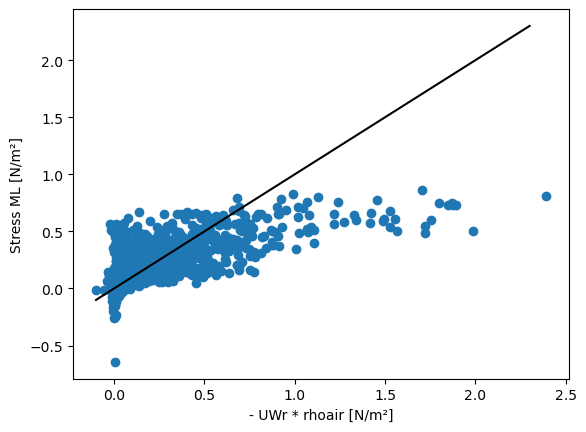

In [64]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 2.3158 - mean_absolute_error: 1.0854 - val_loss: 1.1234 - val_mean_absolute_error: 0.6882
Epoch 2/500
90/90 [==============================] - 0s 840us/step - loss: 1.5237 - mean_absolute_error: 0.8692 - val_loss: 0.9748 - val_mean_absolute_error: 0.6272
Epoch 3/500
90/90 [==============================] - 0s 830us/step - loss: 1.2752 - mean_absolute_error: 0.7927 - val_loss: 0.8875 - val_mean_absolute_error: 0.5903
Epoch 4/500
90/90 [==============================] - 0s 848us/step - loss: 1.0921 - mean_absolute_error: 0.7246 - val_loss: 0.8440 - val_mean_absolute_error: 0.5670
Epoch 5/500
90/90 [==============================] - 0s 827us/step - loss: 1.0050 - mean_absolute_error: 0.6751 - val_loss: 0.7993 - val_mean_absolute_error: 0.5461
Epoch 6/500
90/90 [==============================] - 0s 810us/step - loss: 0.9889 - mean_absolute_error: 0.6643 - val_loss: 0.7560 - val_mean_absolute_error: 0.5244
Epoch 7/500


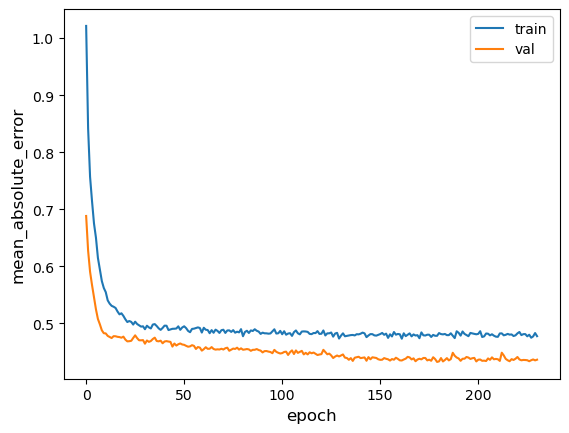

64/64 [==============================] - 0s 308us/step - loss: 0.6435 - mean_absolute_error: 0.4525
Test accuracy 0.45253896713256836
Test loss 0.6435071229934692


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [70]:
rmse(y_test.values, y_test_pred)

0.2877812727941708

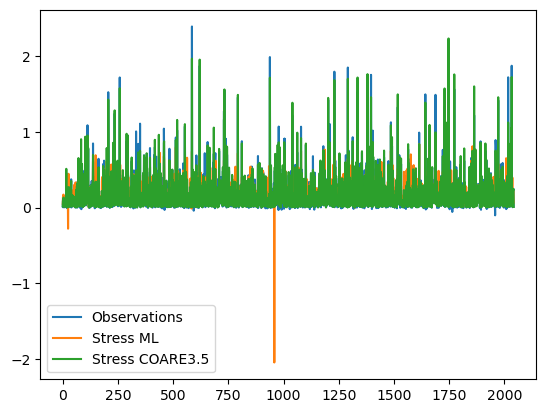

In [71]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

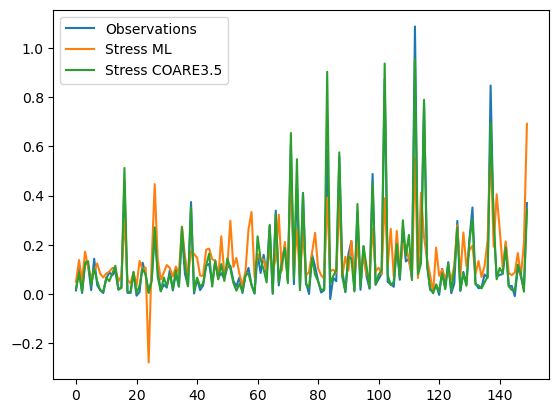

In [72]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

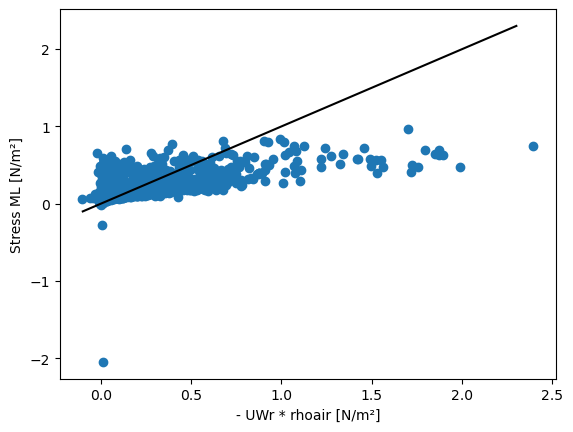

In [73]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [74]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67442257],
       [0.67442257, 1.        ]])

In [75]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

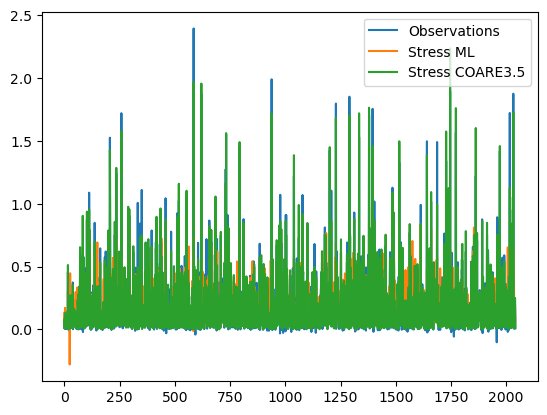

In [76]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

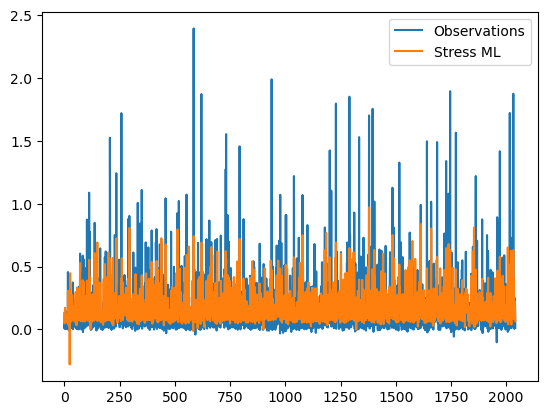

In [77]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [78]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692328],
       [0.97692328, 1.        ]])

In [79]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.28358315668955403

Text(0, 0.5, 'Stress ML [N/m²]')

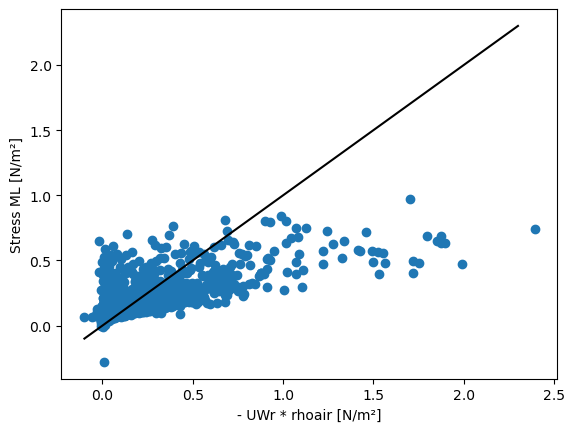

In [80]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [81]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [82]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [83]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.5346 - mean_absolute_error: 1.1408 - val_loss: 1.4064 - val_mean_absolute_error: 0.7667
Epoch 2/500
179/179 [==============================] - 0s 741us/step - loss: 1.5023 - mean_absolute_error: 0.8408 - val_loss: 1.1702 - val_mean_absolute_error: 0.6844
Epoch 3/500
179/179 [==============================] - 0s 733us/step - loss: 1.1764 - mean_absolute_error: 0.7221 - val_loss: 0.9643 - val_mean_absolute_error: 0.6077
Epoch 4/500
179/179 [==============================] - 0s 733us/step - loss: 1.0544 - mean_absolute_error: 0.6647 - val_loss: 0.8322 - val_mean_absolute_error: 0.5579
Epoch 5/500
179/179 [==============================] - 0s 745us/step - loss: 0.8681 - mean_absolute_error: 0.5881 - val_loss: 0.7462 - val_mean_absolute_error: 0.5200
Epoch 6/500
179/179 [==============================] - 0s 732us/step - loss: 0.8408 - mean_absolute_error: 0.5724 - val_loss: 0.7092 - val_mean_absolute_error: 0.4959


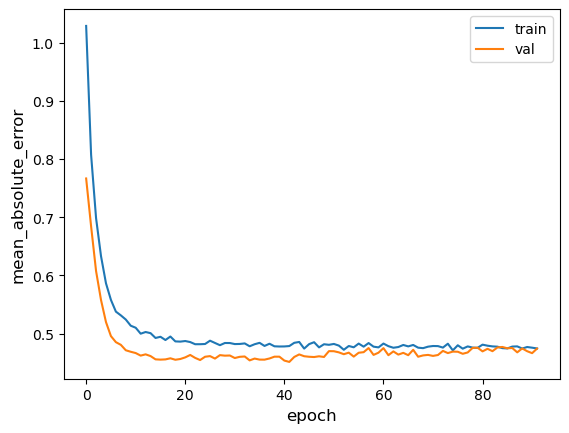

64/64 [==============================] - 0s 342us/step - loss: 0.7227 - mean_absolute_error: 0.4897
Test accuracy 0.48974719643592834
Test loss 0.7226791977882385


In [84]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [85]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [86]:
rmse(y_test.values, y_test_pred)

0.28324638903895627

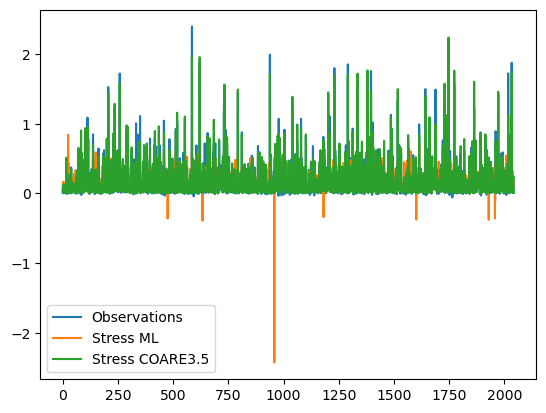

In [87]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

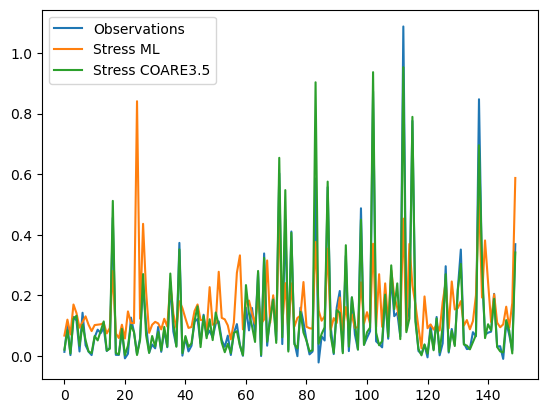

In [88]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

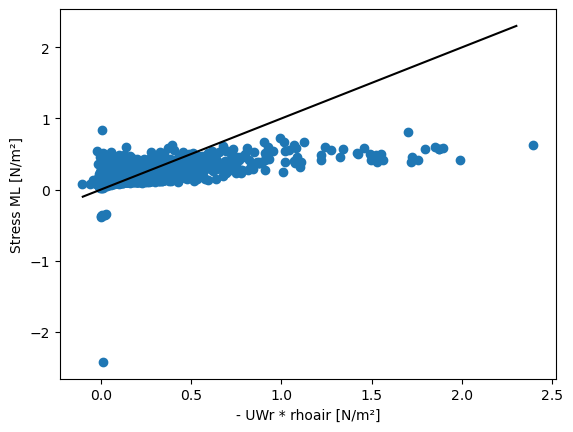

In [89]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [90]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.6181716],
       [0.6181716, 1.       ]])

In [91]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

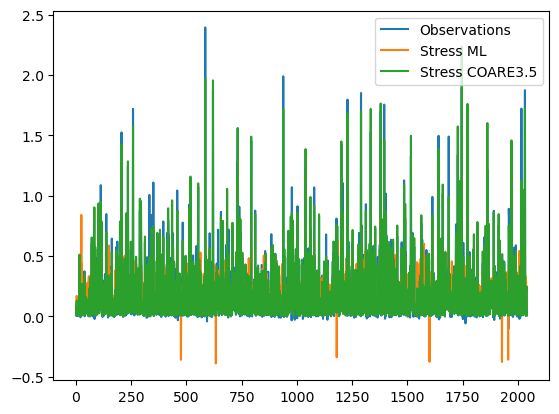

In [92]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

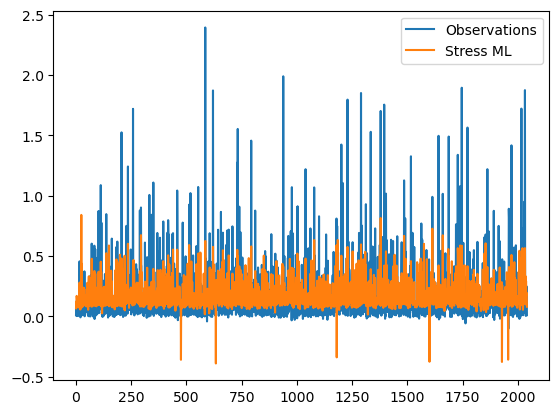

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [94]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97692328],
       [0.97692328, 1.        ]])

In [95]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.27738658753778933

Text(0, 0.5, 'Stress ML [N/m²]')

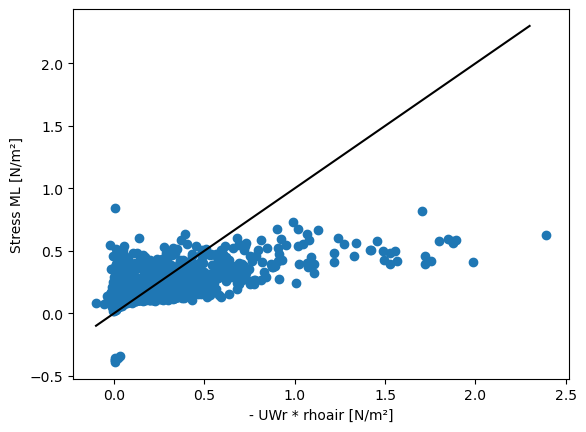

In [96]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [97]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [98]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [99]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.3606 - mean_absolute_error: 0.8449 - val_loss: 0.7248 - val_mean_absolute_error: 0.5410
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.9456 - mean_absolute_error: 0.6780 - val_loss: 0.5763 - val_mean_absolute_error: 0.4558
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7520 - mean_absolute_error: 0.6006 - val_loss: 0.5312 - val_mean_absolute_error: 0.4241
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7229 - mean_absolute_error: 0.5667 - val_loss: 0.5012 - val_mean_absolute_error: 0.4238
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6245 - mean_absolute_error: 0.5220 - val_loss: 0.5019 - val_mean_absolute_error: 0.4140
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5990 - mean_absolute_error: 0.4943 - val_loss: 0.4773 - val_mean_absolute_error: 0.4060
Epoch 7/50

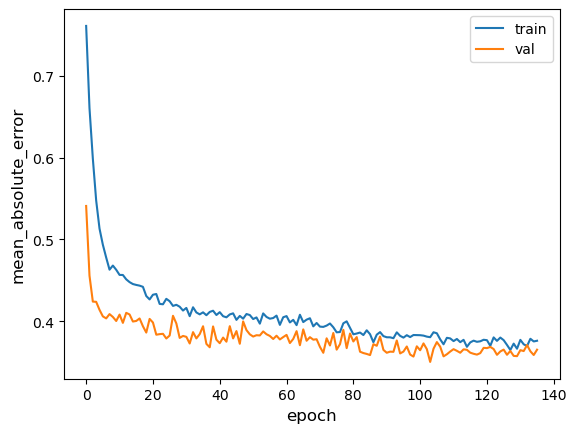

64/64 [==============================] - 0s 387us/step - loss: 0.4908 - mean_absolute_error: 0.3771
Test accuracy 0.37706777453422546
Test loss 0.4907873570919037


In [100]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [101]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [102]:
rmse(y_test.values, y_test_pred)

0.3063566667155395

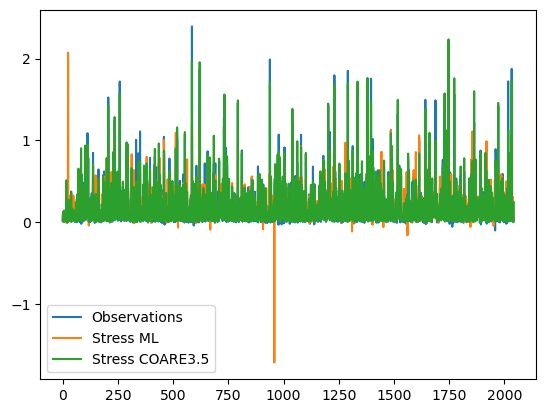

In [103]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

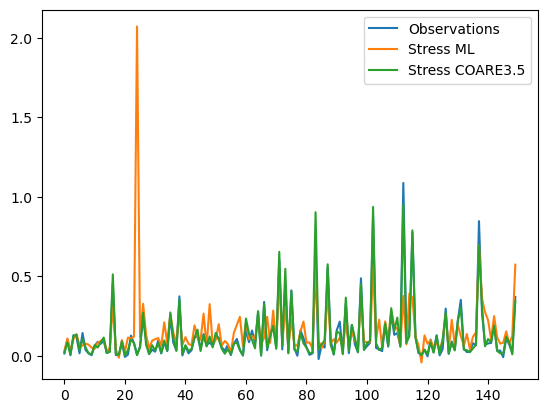

In [104]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

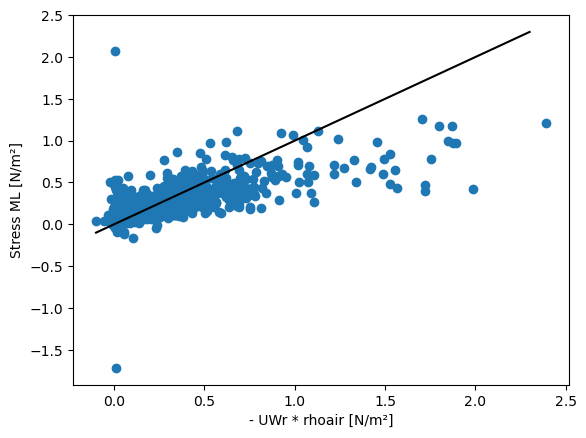

In [105]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [106]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76004371],
       [0.76004371, 1.        ]])

In [107]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

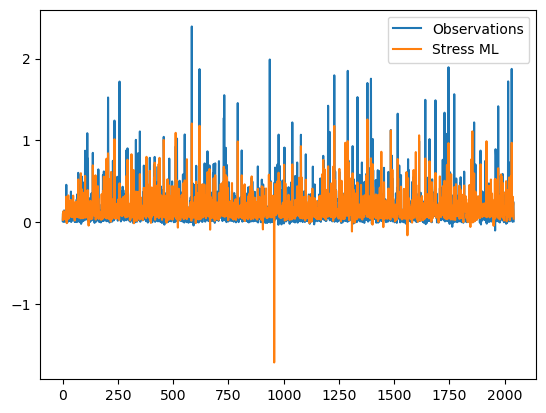

In [108]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [109]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [110]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3063566667155395

Text(0, 0.5, 'Stress ML [N/m²]')

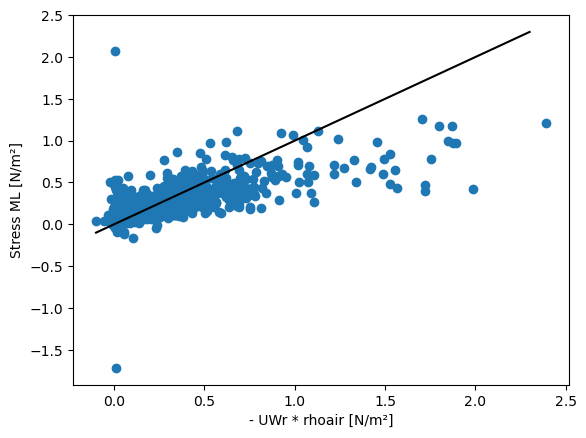

In [111]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [112]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76004371],
       [0.76004371, 1.        ]])

In [113]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [114]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [115]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [116]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 3.0096 - mean_absolute_error: 1.2045 - val_loss: 0.9522 - val_mean_absolute_error: 0.7589
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.9784 - mean_absolute_error: 0.7140 - val_loss: 0.7173 - val_mean_absolute_error: 0.5604
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7990 - mean_absolute_error: 0.6406 - val_loss: 0.5277 - val_mean_absolute_error: 0.4729
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.6184 - mean_absolute_error: 0.5520 - val_loss: 0.4708 - val_mean_absolute_error: 0.4108
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5315 - mean_absolute_error: 0.5010 - val_loss: 0.4449 - val_mean_absolute_error: 0.4169
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5458 - mean_absolute_error: 0.4943 - val_loss: 0.4856 - val_mean_absolute_error: 0.4527
Epoch 7/50

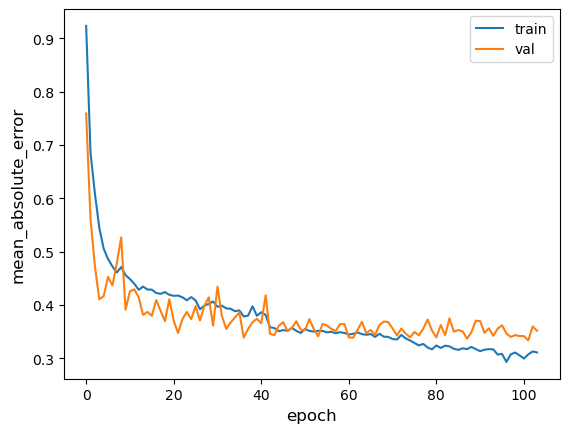

64/64 [==============================] - 0s 683us/step - loss: 0.4764 - mean_absolute_error: 0.3629
Test accuracy 0.3628658056259155
Test loss 0.4764339327812195


In [117]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [118]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [119]:
rmse(y_test.values, y_test_pred)

0.31972797898514593

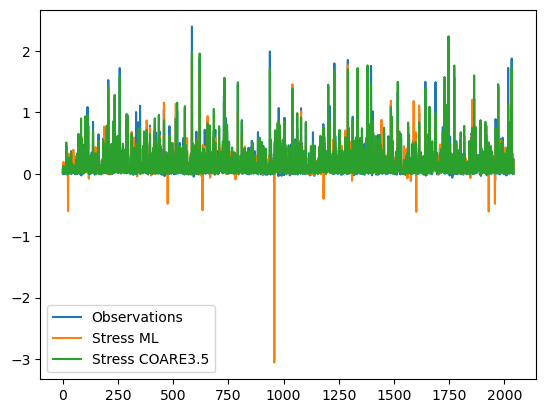

In [120]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

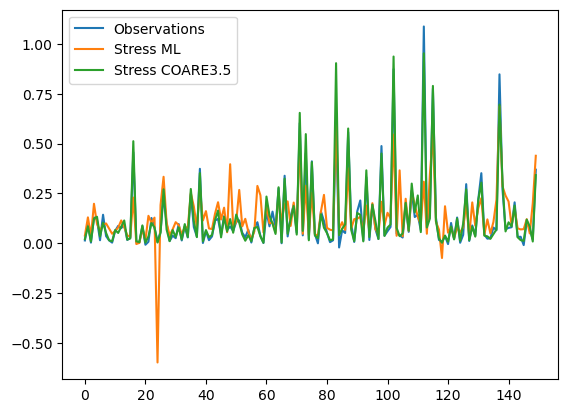

In [121]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [122]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76634689],
       [0.76634689, 1.        ]])

In [123]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

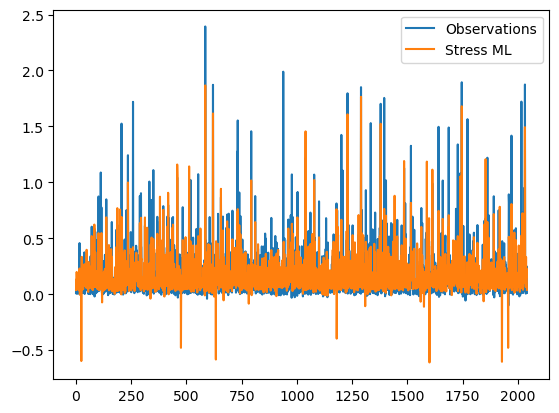

In [124]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [125]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97692328],
       [0.97692328, 1.        ]])

In [126]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.31169262859033714

Text(0, 0.5, 'Stress ML [N/m²]')

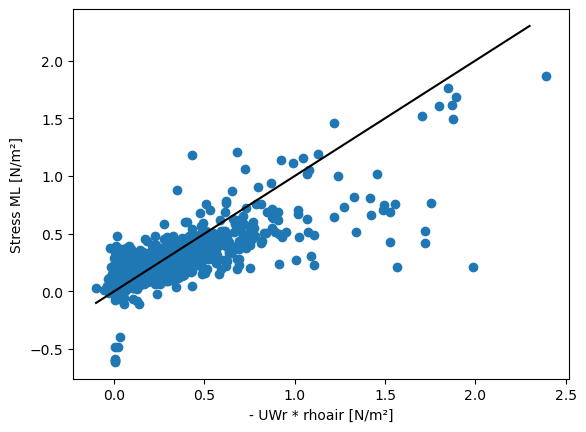

In [127]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [128]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [129]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [130]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 2.9793 - mean_absolute_error: 1.2117 - val_loss: 0.9323 - val_mean_absolute_error: 0.5829
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 0.9593 - mean_absolute_error: 0.7076 - val_loss: 0.8111 - val_mean_absolute_error: 0.5441
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7248 - mean_absolute_error: 0.6025 - val_loss: 0.4892 - val_mean_absolute_error: 0.4314
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.6450 - mean_absolute_error: 0.5595 - val_loss: 0.5030 - val_mean_absolute_error: 0.4418
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.5713 - mean_absolute_error: 0.5182 - val_loss: 0.4205 - val_mean_absolute_error: 0.3846
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.5850 - mean_absolute_error: 0.4953 - val_loss: 0.4444 - val_mean_absolute_error: 0.4236
Epoc

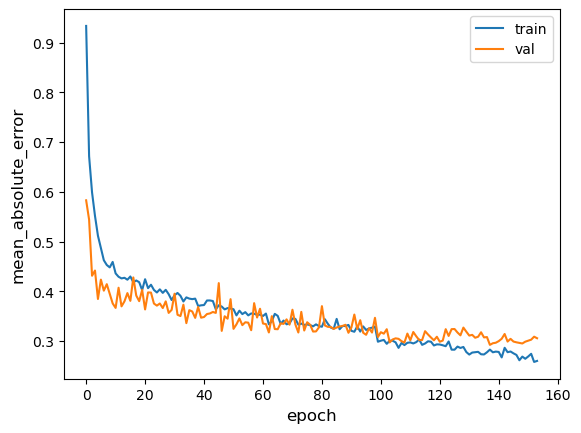

64/64 [==============================] - 0s 2ms/step - loss: 0.3783 - mean_absolute_error: 0.3201
Test accuracy 0.3201410472393036
Test loss 0.37834450602531433


In [131]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [132]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [133]:
rmse(y_test.values, y_test_pred)

0.32028514292424054

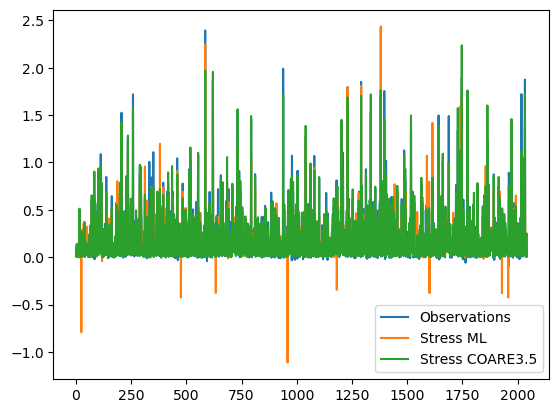

In [134]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

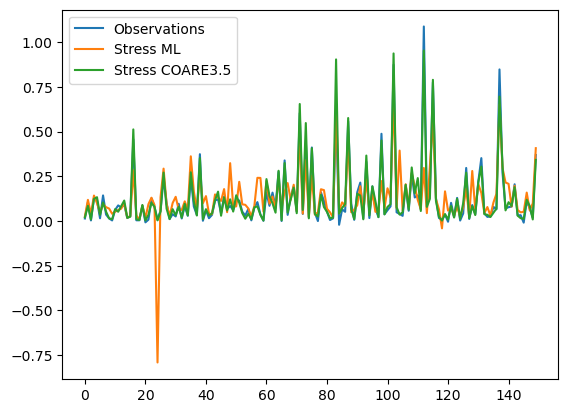

In [135]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [136]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82125891],
       [0.82125891, 1.        ]])

In [137]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

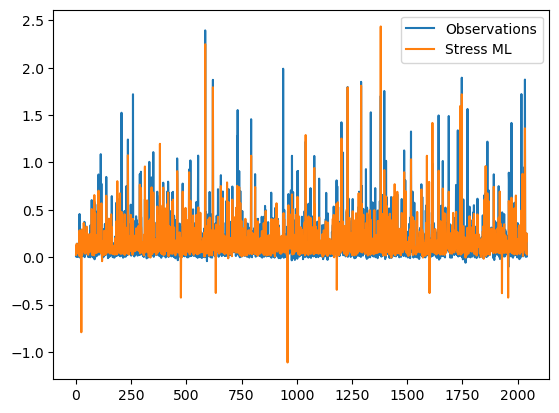

In [138]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [139]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [140]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32028514292424054

Text(0, 0.5, 'Stress ML [N/m²]')

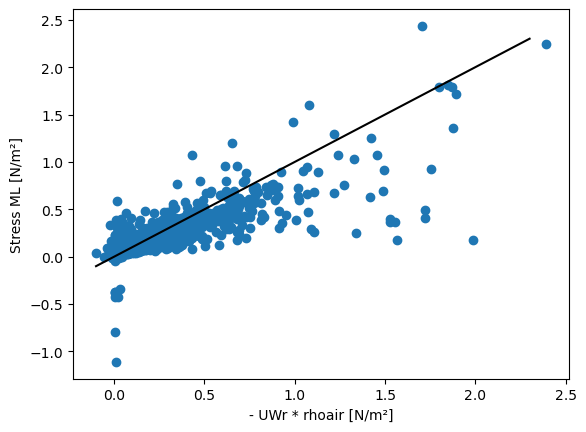

In [141]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

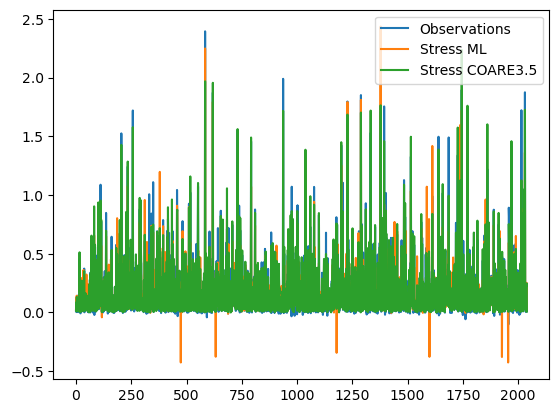

In [142]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

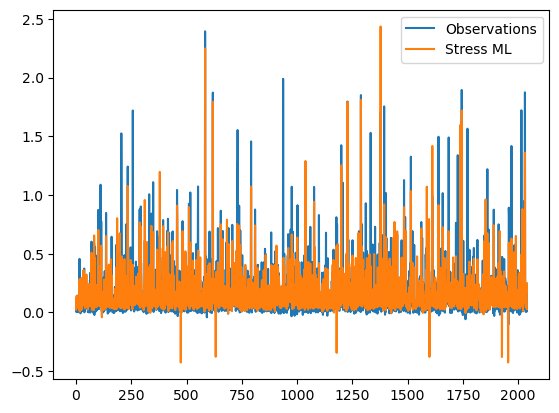

In [143]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [144]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.83109999],
       [0.83109999, 1.        ]])

In [145]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97691795],
       [0.97691795, 1.        ]])

In [146]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.31840934422712436

Text(0, 0.5, 'Stress ML [N/m²]')

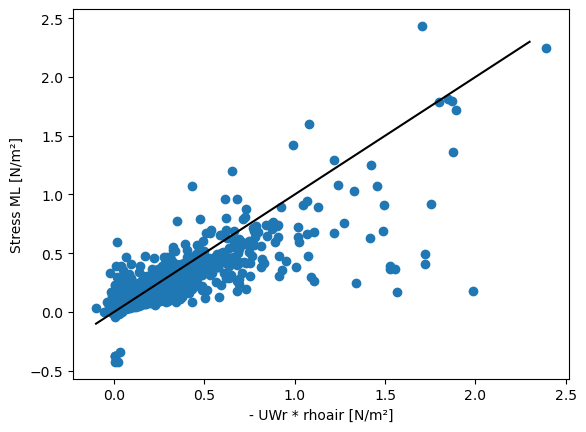

In [147]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [148]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [149]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [150]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 17.3642 - mean_absolute_error: 2.6499 - val_loss: 1.0119 - val_mean_absolute_error: 0.6629
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 2.1014 - mean_absolute_error: 1.0861 - val_loss: 0.9347 - val_mean_absolute_error: 0.6728
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.4810 - mean_absolute_error: 0.8880 - val_loss: 0.8938 - val_mean_absolute_error: 0.6740
Epoch 4/500
12/12 [==============================] - 0s 27ms/step - loss: 1.1658 - mean_absolute_error: 0.7762 - val_loss: 0.9542 - val_mean_absolute_error: 0.7261
Epoch 5/500
12/12 [==============================] - 0s 27ms/step - loss: 0.9941 - mean_absolute_error: 0.7327 - val_loss: 0.9220 - val_mean_absolute_error: 0.7153
Epoch 6/500
12/12 [==============================] - 0s 27ms/step - loss: 0.9721 - mean_absolute_error: 0.7031 - val_loss: 0.9470 - val_mean_absolute_error: 0.7384
Epoch 7/500
12/

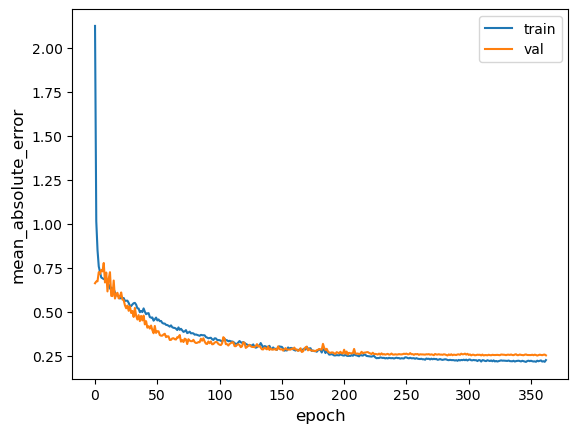

64/64 [==============================] - 0s 2ms/step - loss: 0.2870 - mean_absolute_error: 0.2710
Test accuracy 0.27101248502731323
Test loss 0.28695595264434814


In [151]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [152]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [153]:
rmse(y_test.values, y_test_pred)

0.3318858923115231

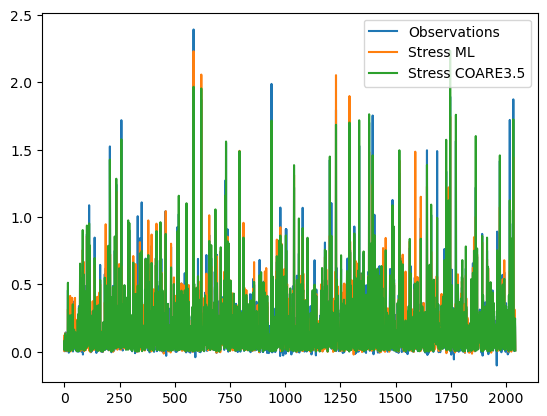

In [154]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

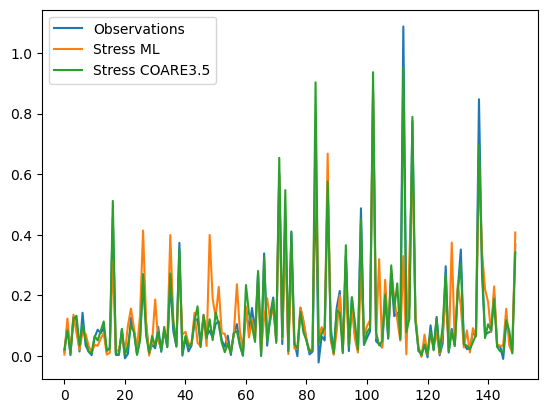

In [155]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [156]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86682679],
       [0.86682679, 1.        ]])

In [157]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

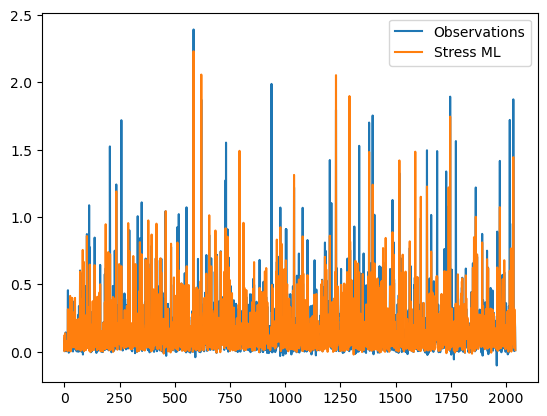

In [158]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [159]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [160]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3318858923115231

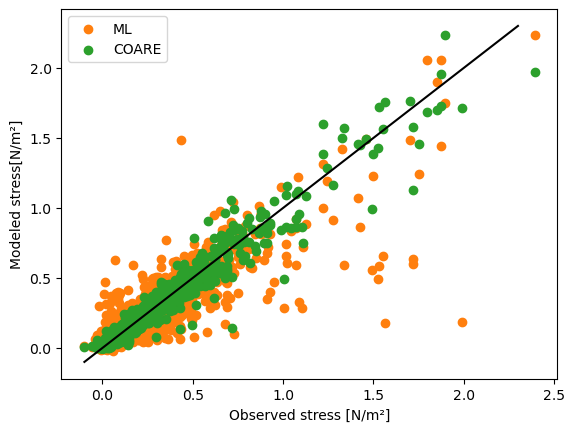

In [161]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

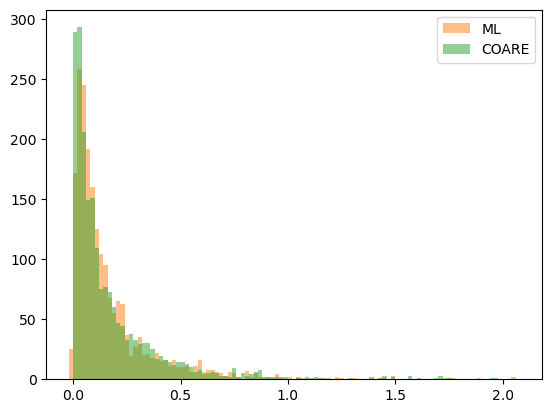

In [162]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [163]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [164]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [165]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 37ms/step - loss: 17.1637 - mean_absolute_error: 2.6227 - val_loss: 0.9630 - val_mean_absolute_error: 0.6397
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 2.1195 - mean_absolute_error: 1.1045 - val_loss: 0.9665 - val_mean_absolute_error: 0.7038
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3140 - mean_absolute_error: 0.8248 - val_loss: 0.9671 - val_mean_absolute_error: 0.7022
Epoch 4/500
12/12 [==============================] - 0s 27ms/step - loss: 1.2327 - mean_absolute_error: 0.7698 - val_loss: 1.1053 - val_mean_absolute_error: 0.8391
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3139 - mean_absolute_error: 0.7462 - val_loss: 1.1557 - val_mean_absolute_error: 0.8868
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0775 - mean_absolute_error: 0.7410 - val_loss: 1.0249 - val_mean_absolute_error: 0.7929
Epoch 7/500
12/

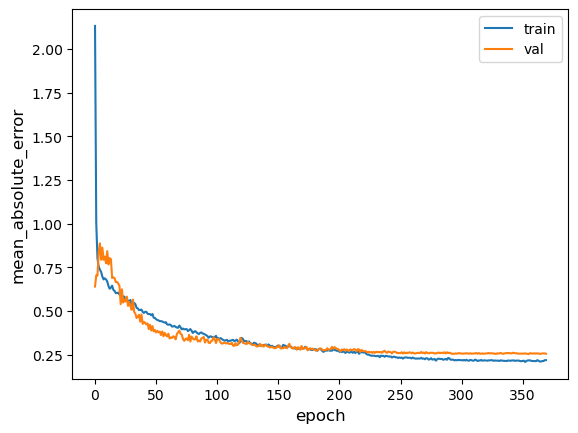

64/64 [==============================] - 0s 2ms/step - loss: 0.2824 - mean_absolute_error: 0.2684
Test accuracy 0.2683819532394409
Test loss 0.2823505699634552


In [166]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [167]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [168]:
rmse(y_test.values, y_test_pred)

0.32895408168105505

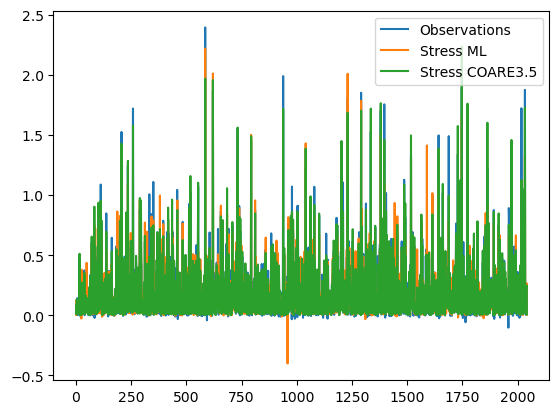

In [169]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

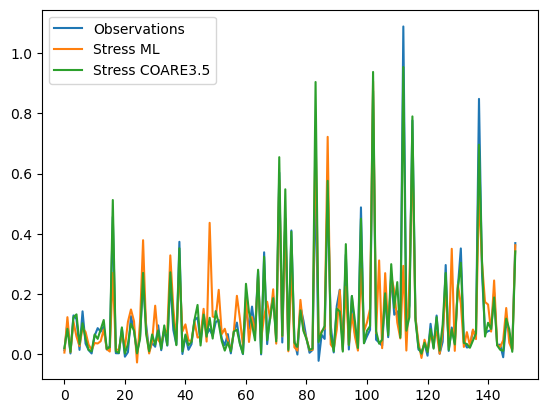

In [170]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [171]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87005613],
       [0.87005613, 1.        ]])

In [172]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

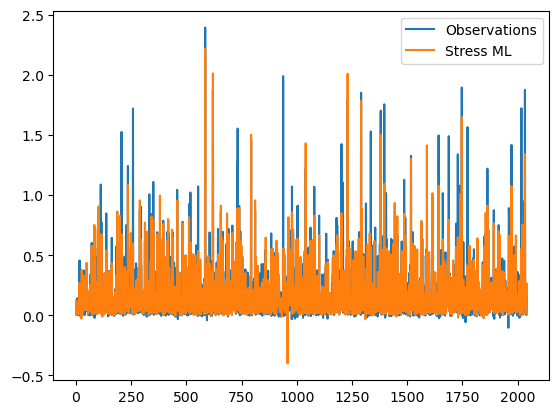

In [173]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [174]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [175]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32895408168105505

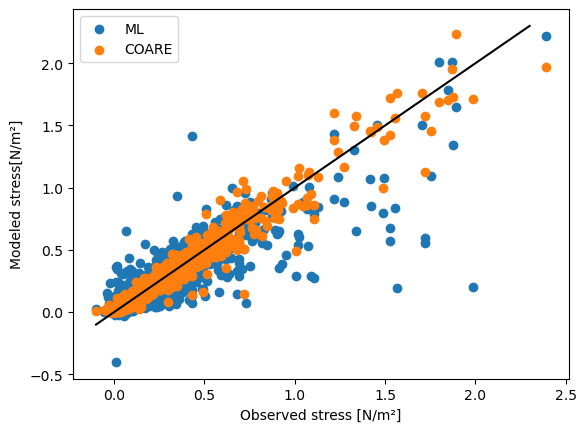

In [176]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

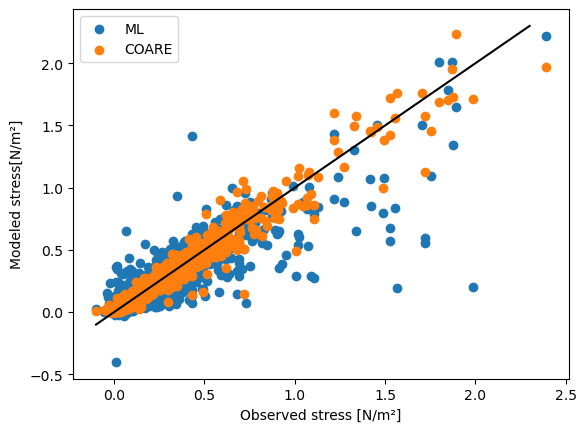

In [177]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [26]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [27]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [28]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-08-29 11:34:23.171851: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 11:34:23.172326: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 11:34:23.172336: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 11:34:23.172355: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 11:34:23.172623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
6/6 [==============================] - 2s 237ms/step - loss: 21.0234 - mean_absolute_error: 2.9588 - val_loss: 0.9878 - val_mean_absolute_error: 0.6103
Epoch 2/500
6/6 [==============================] - 1s 112ms/step - loss: 1.9423 - mean_absolute_error: 1.0086 - val_loss: 0.9173 - val_mean_absolute_error: 0.6602
Epoch 3/500
6/6 [==============================] - 1s 162ms/step - loss: 1.5802 - mean_absolute_error: 0.9282 - val_loss: 0.9682 - val_mean_absolute_error: 0.7528
Epoch 4/500
6/6 [==============================] - 1s 116ms/step - loss: 1.6330 - mean_absolute_error: 0.8822 - val_loss: 1.0537 - val_mean_absolute_error: 0.8202
Epoch 5/500
6/6 [==============================] - 1s 128ms/step - loss: 1.3841 - mean_absolute_error: 0.7745 - val_loss: 1.0940 - val_mean_absolute_error: 0.7812
Epoch 6/500
6/6 [==============================] - 1s 120ms/step - loss: 1.3608 - mean_absolute_error: 0.7644 - val_loss: 1.1799 - val_mean_absolute_error: 0.9122
Epoch 7/500
6/6 [====

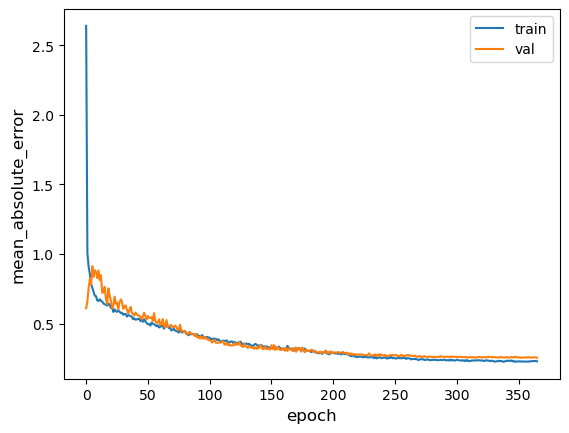

64/64 [==============================] - 1s 8ms/step - loss: 0.3007 - mean_absolute_error: 0.2758
Test accuracy 0.2757733464241028
Test loss 0.3006862998008728


In [29]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [30]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [31]:
rmse(y_test.values, y_test_pred)

0.32933016794668174

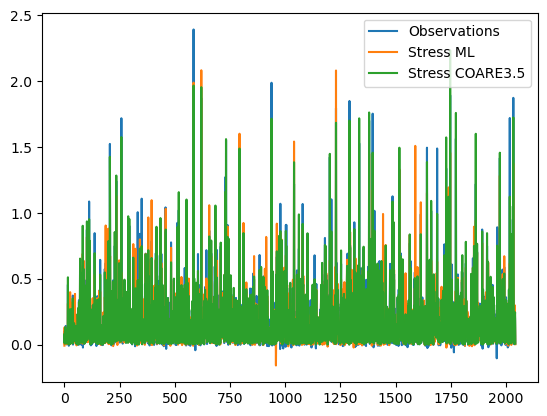

In [32]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

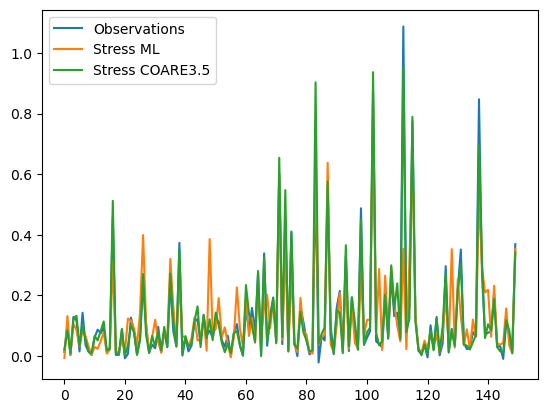

In [33]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [34]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86121439],
       [0.86121439, 1.        ]])

In [35]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

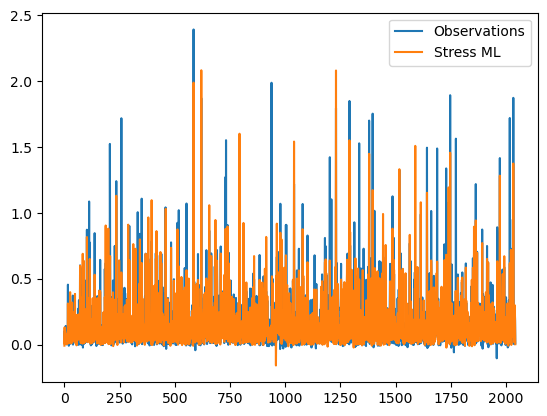

In [36]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [37]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [38]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32933016794668174

Text(0, 0.5, 'Stress ML [N/m²]')

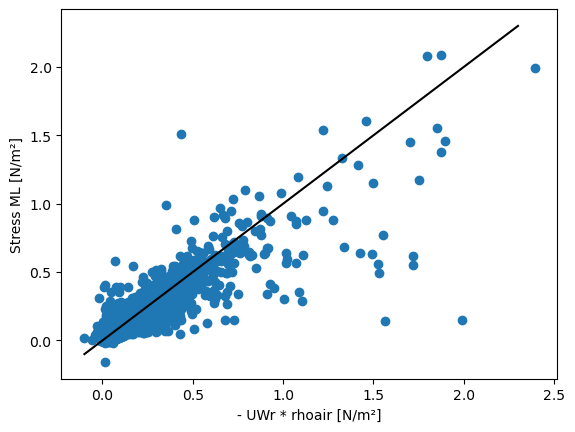

In [39]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

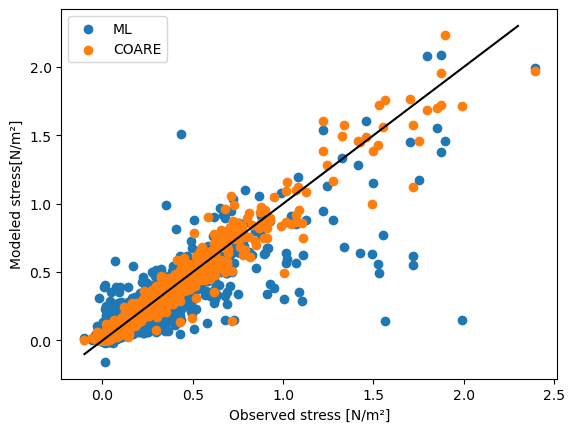

In [40]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [41]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [42]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [43]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 620ms/step - loss: 19.7595 - mean_absolute_error: 2.7869 - val_loss: 1.0831 - val_mean_absolute_error: 0.6910
Epoch 2/1000
3/3 [==============================] - 2s 560ms/step - loss: 3.6226 - mean_absolute_error: 1.4297 - val_loss: 1.2688 - val_mean_absolute_error: 0.8799
Epoch 3/1000
3/3 [==============================] - 2s 543ms/step - loss: 2.1713 - mean_absolute_error: 1.1134 - val_loss: 1.3220 - val_mean_absolute_error: 0.7635
Epoch 4/1000
3/3 [==============================] - 2s 552ms/step - loss: 1.8820 - mean_absolute_error: 0.9629 - val_loss: 2.5217 - val_mean_absolute_error: 1.2297
Epoch 5/1000
3/3 [==============================] - 2s 561ms/step - loss: 2.0489 - mean_absolute_error: 0.8834 - val_loss: 2.6178 - val_mean_absolute_error: 1.3355
Epoch 6/1000
3/3 [==============================] - 2s 544ms/step - loss: 1.8777 - mean_absolute_error: 0.9062 - val_loss: 3.4337 - val_mean_absolute_error: 1.4406
Epoch 7/1000
3/

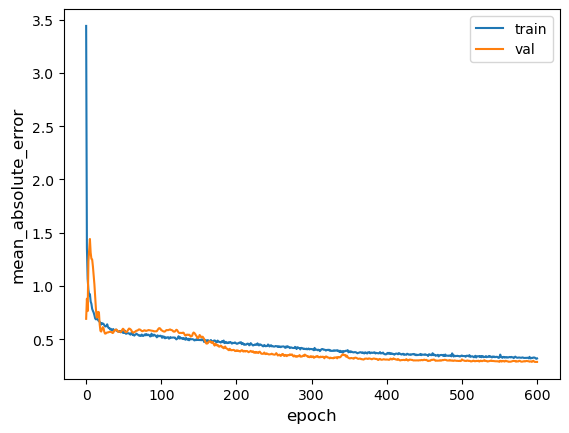

64/64 [==============================] - 2s 25ms/step - loss: 0.3439 - mean_absolute_error: 0.3020
Test accuracy 0.30196380615234375
Test loss 0.3439173102378845


In [44]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [45]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [46]:
rmse(y_test.values, y_test_pred)

0.31601083987925005

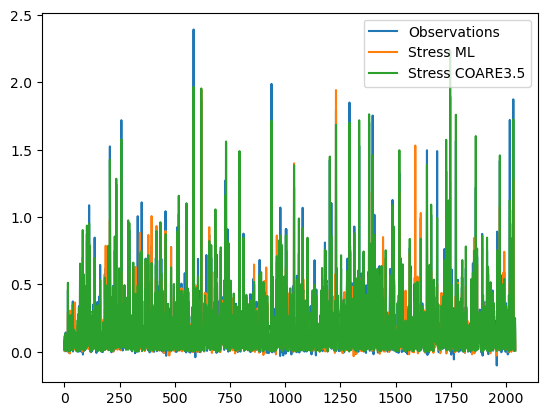

In [47]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

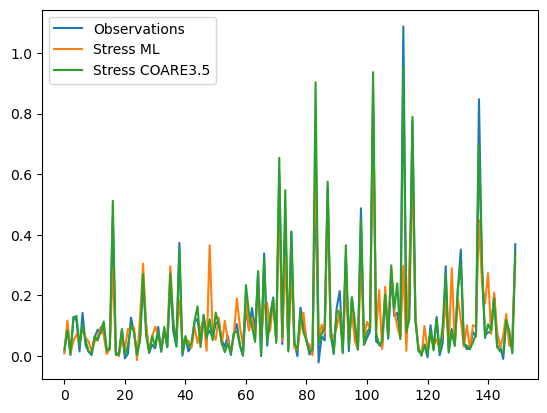

In [48]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [49]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84922225],
       [0.84922225, 1.        ]])

In [50]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

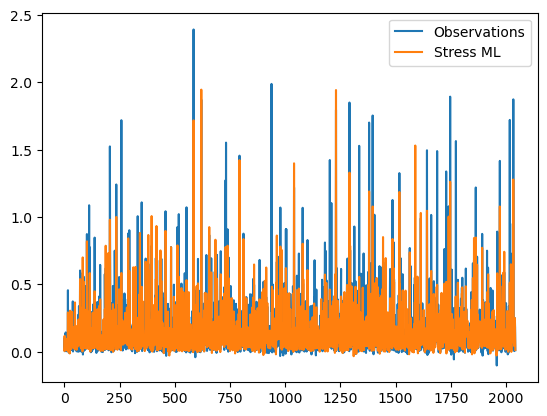

In [51]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [52]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [53]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31601083987925005

Text(0, 0.5, 'Stress ML [N/m²]')

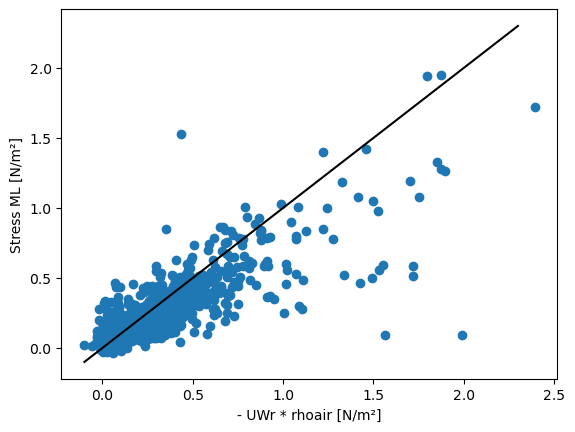

In [54]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [55]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [56]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [57]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 569ms/step - loss: 19.3640 - mean_absolute_error: 2.9949 - val_loss: 1.3674 - val_mean_absolute_error: 0.6601
Epoch 2/1000
3/3 [==============================] - 1s 511ms/step - loss: 3.8304 - mean_absolute_error: 1.4280 - val_loss: 0.9636 - val_mean_absolute_error: 0.5953
Epoch 3/1000
3/3 [==============================] - 1s 501ms/step - loss: 2.3556 - mean_absolute_error: 1.1268 - val_loss: 1.2896 - val_mean_absolute_error: 0.6402
Epoch 4/1000
3/3 [==============================] - 1s 503ms/step - loss: 1.7775 - mean_absolute_error: 0.9544 - val_loss: 2.3458 - val_mean_absolute_error: 0.9389
Epoch 5/1000
3/3 [==============================] - 1s 507ms/step - loss: 1.3705 - mean_absolute_error: 0.8541 - val_loss: 2.3626 - val_mean_absolute_error: 1.2177
Epoch 6/1000
3/3 [==============================] - 1s 498ms/step - loss: 1.3138 - mean_absolute_error: 0.8298 - val_loss: 3.4209 - val_mean_absolute_error: 1.5729
Epoch 7/1000
3/

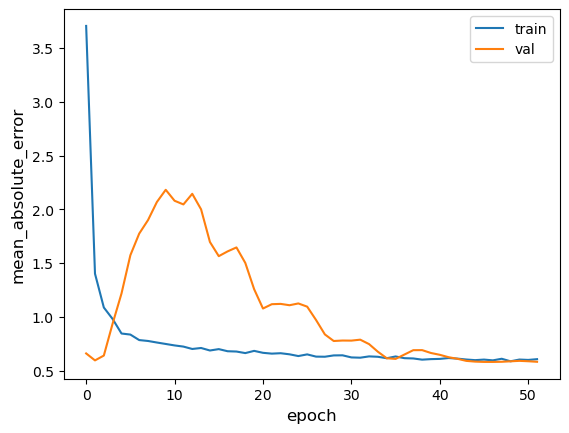

64/64 [==============================] - 2s 26ms/step - loss: 1.3489 - mean_absolute_error: 0.6047
Test accuracy 0.6047335267066956
Test loss 1.3489418029785156


In [58]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [59]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [60]:
rmse(y_test.values, y_test_pred)

0.2771047984489517

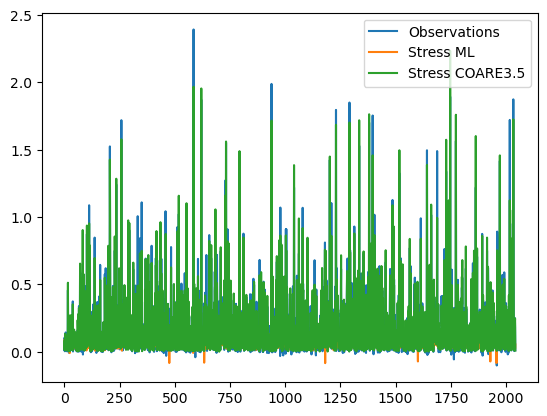

In [61]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

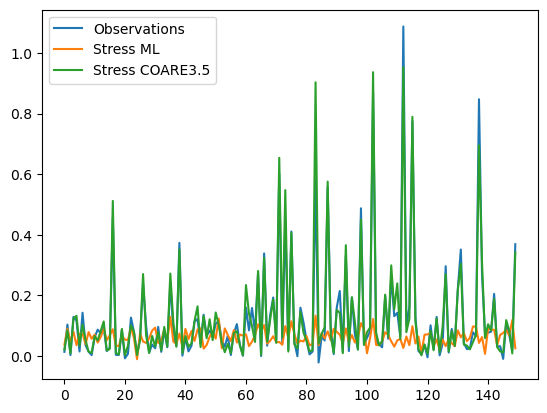

In [62]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [63]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17405029],
       [0.17405029, 1.        ]])

In [64]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

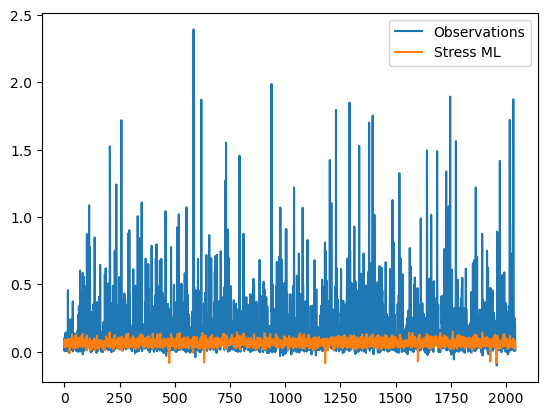

In [65]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [66]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

In [67]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2771047984489517

Text(0, 0.5, 'Stress ML [N/m²]')

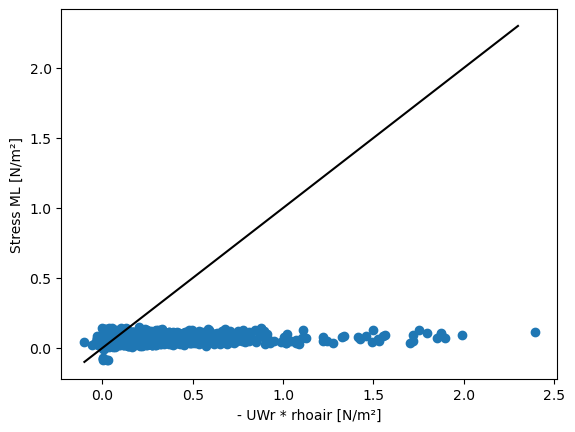

In [68]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [69]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [70]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [71]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 639ms/step - loss: 15.9196 - mean_absolute_error: 2.8246 - val_loss: 1.0834 - val_mean_absolute_error: 0.6366
Epoch 2/1000
3/3 [==============================] - 2s 556ms/step - loss: 3.2746 - mean_absolute_error: 1.3798 - val_loss: 0.9459 - val_mean_absolute_error: 0.6000
Epoch 3/1000
3/3 [==============================] - 2s 562ms/step - loss: 2.0817 - mean_absolute_error: 1.0828 - val_loss: 2.1215 - val_mean_absolute_error: 0.9218
Epoch 4/1000
3/3 [==============================] - 2s 562ms/step - loss: 1.8017 - mean_absolute_error: 0.9735 - val_loss: 1.2823 - val_mean_absolute_error: 0.7410
Epoch 5/1000
3/3 [==============================] - 2s 621ms/step - loss: 1.7917 - mean_absolute_error: 0.9691 - val_loss: 2.2535 - val_mean_absolute_error: 1.0470
Epoch 6/1000
3/3 [==============================] - 2s 564ms/step - loss: 1.4357 - mean_absolute_error: 0.7911 - val_loss: 2.8076 - val_mean_absolute_error: 1.3171
Epoch 7/1000
3/

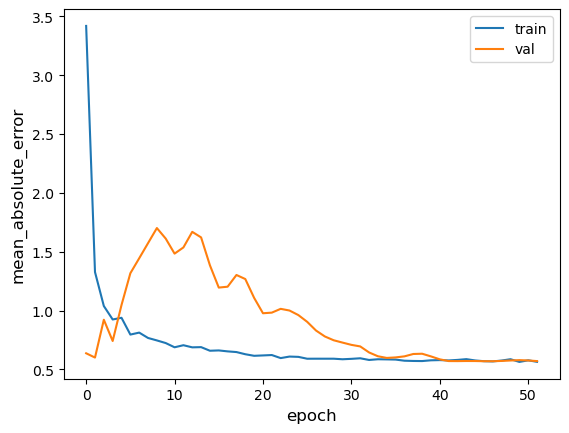

64/64 [==============================] - 2s 25ms/step - loss: 4.5488 - mean_absolute_error: 1.9764
Test accuracy 1.976420283317566
Test loss 4.548820495605469


In [72]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [73]:
y_test_pred = multi_dense_model.predict(x_test)

In [74]:
rmse(y_test.values, y_test_pred)

2.142559147242602

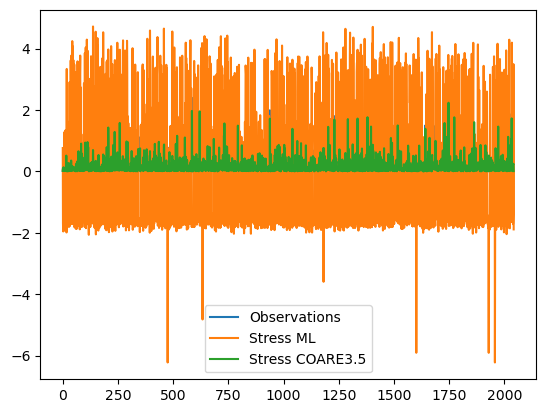

In [75]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

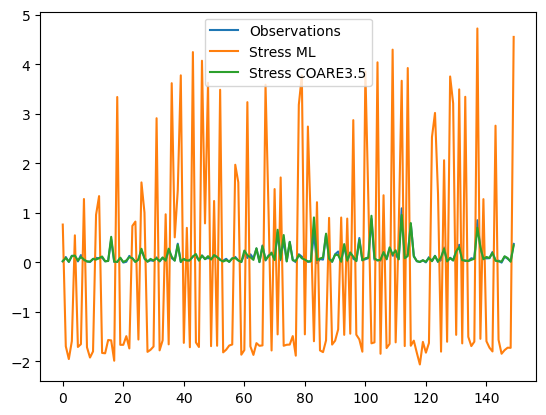

In [76]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [77]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.03947039],
       [0.03947039, 1.        ]])

In [78]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97692828],
       [0.97692828, 1.        ]])

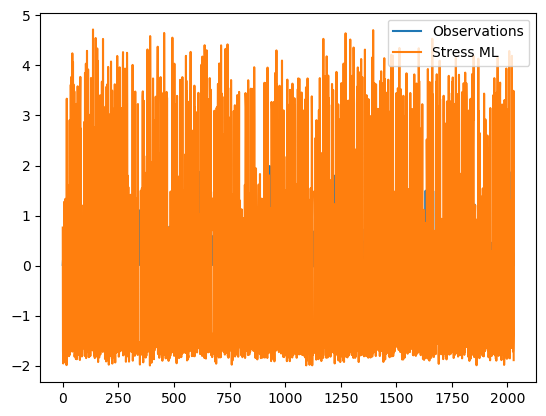

In [79]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [80]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97688122],
       [0.97688122, 1.        ]])

In [81]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

2.122991218803724

Text(0, 0.5, 'Stress ML [N/m²]')

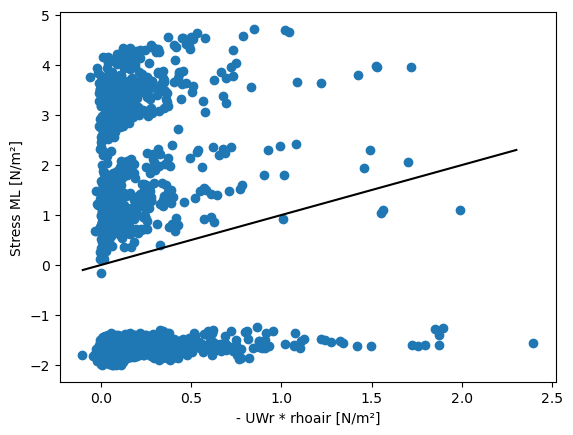

In [82]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 